### Load Libraries

In [1]:
import pickle

import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib as mpl
import numpy as np
import pandas as pd
pd.options.display.max_rows = 10

import scipy.sparse as sp

In [2]:
from utilities import utils

### 1. Playlist Dataframe

In [3]:
playlists_df = pd.read_pickle('./data/playlists_ndb.compress', compression='gzip')

In [4]:
playlists_df.shape

(279032, 8)

In [5]:
playlists_df.sample()

,pid,name,num_tracks,num_artists,num_albums,num_followers,duration_ms,tracks
49967,49967,all the feels,179,126,157,1,43846933,"[2D4BSm5Z8Hq5zYbSgJwEOh, 46QrTPAuu0iJHnECJKIWW..."


In [6]:
playlists_df.drop(['tracks'], axis=1, inplace=True)

In [7]:
playlists_df

,pid,name,num_tracks,num_artists,num_albums,num_followers,duration_ms
0,0,Awesome Playlist,39,21,23,1,11656470
1,1,Wedding,80,56,71,1,19156557
2,2,2017,53,48,52,1,12674796
3,3,BOP,46,23,37,2,9948921
4,4,VIBE,134,99,117,1,35655891
...,...,...,...,...,...,...,...
279027,279027,Lake,132,82,99,1,30704124
279028,279028,Calm,182,112,157,2,45890868
279029,279029,PARTAY,94,71,88,1,20689502
279030,279030,Sleep,39,26,35,2,9525414


In [8]:
playlists_df.describe()

,pid,num_tracks,num_artists,num_albums,num_followers,duration_ms
count,279032.000000,279032.000000,279032.000000,279032.00000,279032.000000,2.790320e+05
mean,139515.500000,85.485561,53.752050,68.09715,2.827690,2.021510e+07
std,80549.744494,58.035471,35.275809,45.33456,148.847771,1.392037e+07
min,0.000000,5.000000,3.000000,2.00000,1.000000,8.461420e+05
25%,69757.750000,39.000000,27.000000,33.00000,1.000000,9.210809e+06
50%,139515.500000,70.000000,45.000000,57.00000,1.000000,1.654753e+07
75%,209273.250000,120.000000,73.000000,94.00000,2.000000,2.828708e+07
max,279031.000000,376.000000,238.000000,244.00000,53519.000000,1.140385e+08


In [9]:
playlists_df.dtypes

pid               int64
name             object
num_tracks        int64
num_artists       int64
num_albums        int64
num_followers     int64
duration_ms       int64
dtype: object

In [10]:
print('Memory used:', utils.memory_usage(playlists_df), 'Mb')

Memory used: 30.21 Mb


In [11]:
playlists_desc = playlists_df[['num_tracks', 'num_artists', 'num_albums']]
playlists_desc.head()

,num_tracks,num_artists,num_albums
0,39,21,23
1,80,56,71
2,53,48,52
3,46,23,37
4,134,99,117


In [12]:
playlists_desc.describe()

,num_tracks,num_artists,num_albums
count,279032.000000,279032.000000,279032.00000
mean,85.485561,53.752050,68.09715
std,58.035471,35.275809,45.33456
min,5.000000,3.000000,2.00000
25%,39.000000,27.000000,33.00000
50%,70.000000,45.000000,57.00000
75%,120.000000,73.000000,94.00000
max,376.000000,238.000000,244.00000


In [13]:
playlists_desc_array = np.array(playlists_desc)
playlists_desc_array

array([[ 39,  21,  23],
       [ 80,  56,  71],
       [ 53,  48,  52],
       ...,
       [ 94,  71,  88],
       [ 39,  26,  35],
       [110,  48,  77]], dtype=int64)

### Distribution of Num. of Tracks, Artists and Albums per Playlist in NDB_MPD dataset

Text(0.5, 1.0, 'Distribution of Num. of Tracks, Artists and Albums per Playlist in NDB_MPD dataset')

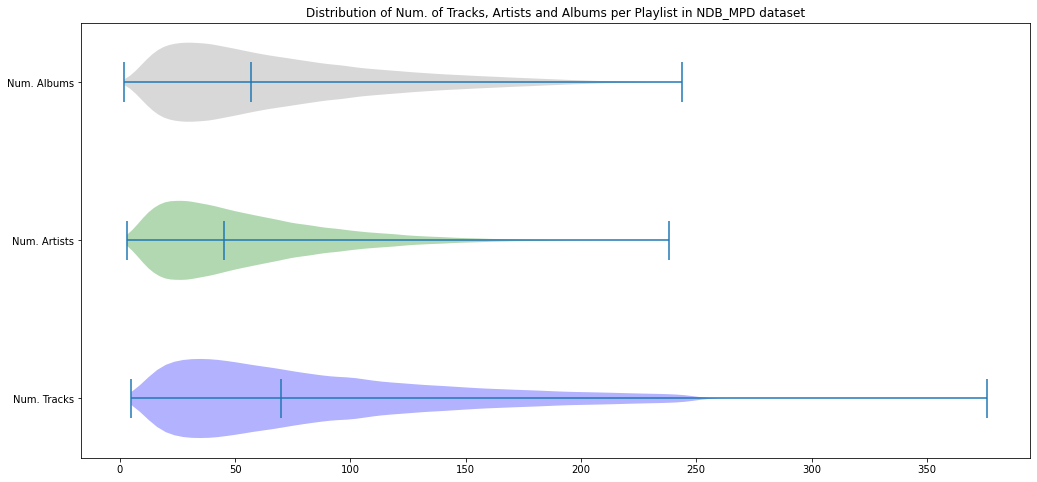

In [14]:
colors = ['blue', 'green', 'grey', 'orange']
fig0 = plt.figure(figsize=(17,8))
vp = plt.violinplot(playlists_desc_array,
                    showmedians=True,
                    vert=False)
plt.yticks([1, 2, 3], ['Num. Tracks', 'Num. Artists', 'Num. Albums'])
for i in range(len(vp['bodies'])):    
    vp['bodies'][i].set(facecolor=colors[i]) 
plt.title('Distribution of Num. of Tracks, Artists and Albums per Playlist in NDB_MPD dataset')
#plt.show()

In [15]:
# Follows a positively skewed distribution. Display median values

playlists_desc.median()

num_tracks     70.0
num_artists    45.0
num_albums     57.0
dtype: float64

In [16]:
fig0.savefig('./visualization/Distribution of Tracks, Artists and Albums per Playlist in NDB_MPD dataset.png')

### 2. Tracks Dataframe

In [17]:
ndb_mpd_tracks_df = pd.read_pickle('./data/ndb_mpd_tracks.compress', compression='gzip')

In [18]:
ndb_mpd_tracks_df.sample()

,track_uri,track_name,duration_ms,artist_uri,artist_name,album_uri,album_name,spid,tid,artist_spid,artist_followers,artist_popularity,artist_genres,2016,2017,2018,2019,2021
3348,spotify:track:3YrfxtQwctFtNB6LGZSwrb,By the kiss,243146,spotify:artist:63MQldklfxkjYDoUE4Tppz,M83,spotify:album:7rMdrNcYIotfAnIzVL5IIW,Digital Shades Vol 1,3YrfxtQwctFtNB6LGZSwrb,156141,63MQldklfxkjYDoUE4Tppz,1910191,73,"['french shoegaze', 'french synthpop', 'indiet...",1,0,0,0,0


In [19]:
# Create a set with track IDs from NDB Artists Tracks
mpd_tracks_set = set(ndb_mpd_tracks_df['tid'].to_list())

In [20]:
tracks_df = pd.read_pickle('./data/tracks_ndb.compress', compression='gzip')

In [21]:
tracks_df.shape

(1124914, 9)

In [22]:
tracks_df.sample()

,track_uri,track_name,duration_ms,artist_uri,artist_name,album_uri,album_name,spid,tid
482836,spotify:track:1Kq9I8YjMxOybDnS3okInT,Old Times - Original Mix,406564,spotify:artist:6H6VFCKcJLUKANeWVr5mYU,Luca M,spotify:album:3rnetiVo8Yh8M3Xrdpby8M,Old Times EP,1Kq9I8YjMxOybDnS3okInT,482836


In [23]:
# Add a column to check if track is from NDB Artist

tracks_df['NDB'] = 0

In [24]:
tracks_df['NDB'] = np.where(tracks_df['tid'].isin(mpd_tracks_set),1,0)

In [25]:
print('Memory used:', utils.memory_usage(tracks_df), 'Mb')

Memory used: 648.8 Mb


In [26]:
sparse_matrix = sp.load_npz('./data/matrix_playlistTrackRating_ndb.npz')

In [27]:
sparse_matrix

<279032x1124914 sparse matrix of type '<class 'numpy.int8'>'
	with 23545215 stored elements in Compressed Sparse Row format>

In [28]:
sparse_matrix.shape

(279032, 1124914)

In [29]:
sparse_matrix.nnz

23545215

In [30]:
# Total Rates per track (default order by tid [0 - 1124913])

track_rates = [i.nnz for i in sparse_matrix.T.tolil()]

In [31]:
len(track_rates)

1124914

In [32]:
# Add track_rates to tracks_df

tracks_df['track_rates'] = track_rates

In [33]:
tracks_df.groupby(['track_rates'])[['spid','tid','NDB']].min().sort_values(by=['track_rates'], ascending=False)

,spid,tid,NDB
track_rates,,,
19393,6ZYS6QQxTLsQ6IFXdVx1r4,2182,1
18776,7yq4Qj7cqayVTp3FF9CWbm,568,0
17450,1eyzqe2QqGZUmfcPZtrIyt,9072,1
16742,1jdNcAD8Ir58RlsdGjJJdx,94,1
16067,4bHsxqR3GMrXTxEPLuK5ue,2008,0
...,...,...,...
5,004S9VA1BRZgP4o27cofag,139,0
4,000P83HDtOHcNVFZy7Q2Yu,156,0
3,0002yNGLtYSYtc0X6ZnFvp,128,0


In [34]:
tracks_df.describe()

,duration_ms,tid,NDB,track_rates
count,1.124914e+06,1.124914e+06,1.124914e+06,1.124914e+06
mean,2.441817e+05,5.624565e+05,1.386773e-02,2.093068e+01
std,1.280921e+05,3.247348e+05,1.169420e-01,2.013833e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.880930e+05,2.812282e+05,0.000000e+00,1.000000e+00
50%,2.261060e+05,5.624565e+05,0.000000e+00,2.000000e+00
75%,2.748260e+05,8.436848e+05,0.000000e+00,4.000000e+00
max,1.043547e+07,1.124913e+06,1.000000e+00,1.939300e+04


### NDB Artist set inside NDB_MPD Playlists

In [35]:
# Totals Tracks, Artists, Albums, Ratings for NDB_MPD dataframe

totals = tracks_df.agg({'tid': 'count', 'artist_uri': 'nunique', 'album_uri': 'nunique', 'track_rates': 'sum'})\
         .rename({'tid': 'Total_Tracks', 'artist_uri': 'Total_Artists', 'album_uri': 'Total_Albums', 'track_rates': 'Total_Rates'})

In [36]:
# Totals Tracks, Artists, Albums, Ratings for NDB Artists in NDB_MPD dataframe

ndb_totals = tracks_df[tracks_df['NDB']==1].agg({'tid': 'count', 'artist_uri': 'nunique', 'album_uri': 'nunique', 'track_rates': 'sum'})\
         .rename({'tid': 'Total_Tracks', 'artist_uri': 'Total_Artists', 'album_uri': 'Total_Albums', 'track_rates': 'Total_Rates'})

In [37]:
tracks_summary_df = pd.DataFrame({'NDB_MPD': totals.values, 'NDB': ndb_totals.values},
                                 index=['Tracks', 'Artists', 'Albums', 'Ratings'])

In [38]:
tracks_summary_df

,NDB_MPD,NDB
Tracks,1124914,15600
Artists,172112,180
Albums,426060,3283
Ratings,23545215,767220


In [39]:
tracks_summary_df.loc['Tracks'].index

Index(['NDB_MPD', 'NDB'], dtype='object')

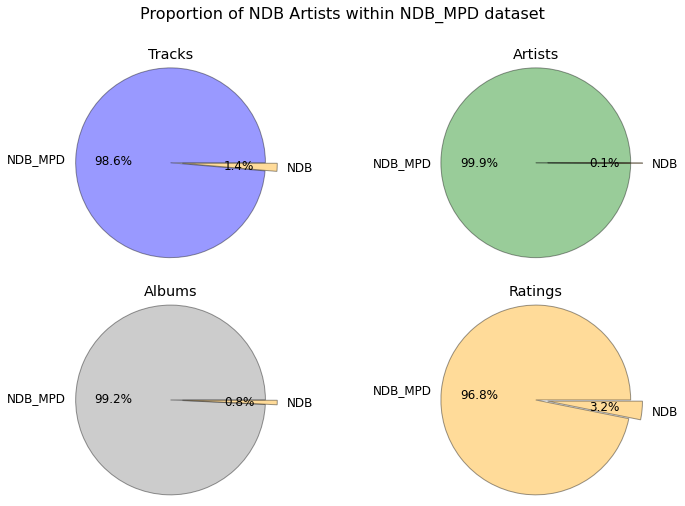

In [40]:
fig = plt.figure(figsize=(12,8))
the_grid = GridSpec(2, 2)
explode = [0, 0.15]
mpl.rcParams['font.size'] = 12

plt.suptitle('Proportion of NDB Artists within NDB_MPD dataset', fontsize=16)

plt.subplot(the_grid[0, 0], aspect=1, title='Tracks')
tracks_labels = tracks_summary_df.loc['Tracks'].index
tracks_counts = tracks_summary_df.loc['Tracks'].values
tracks_pie = plt.pie(tracks_counts, labels=tracks_labels, autopct='%1.1f%%', radius=1.2, explode=explode, 
                     colors=[colors[0],colors[3]], wedgeprops={'alpha':0.4, 'edgecolor': 'black'})

plt.subplot(the_grid[0, 1], aspect=1, title='Artists')
artists_labels = tracks_summary_df.loc['Artists'].index
artists_counts = tracks_summary_df.loc['Artists'].values
artists_pie = plt.pie(artists_counts, labels=artists_labels, autopct='%1.1f%%', radius=1.2, explode=explode, 
                      colors=[colors[1],colors[3]], wedgeprops={'alpha':0.4, 'edgecolor': 'black'})

plt.subplot(the_grid[1, 0], aspect=1, title='Albums')
albums_labels = tracks_summary_df.loc['Albums'].index
albums_counts = tracks_summary_df.loc['Albums'].values
albums_pie = plt.pie(albums_counts, labels=albums_labels, autopct='%1.1f%%', radius=1.2, explode=explode, 
                     colors=[colors[2],colors[3]], wedgeprops={'alpha':0.4, 'edgecolor': 'black'})

plt.subplot(the_grid[1, 1], aspect=1, title='Ratings')
ratings_labels = tracks_summary_df.loc['Ratings'].index
ratings_counts = tracks_summary_df.loc['Ratings'].values
ratings_pie = plt.pie(ratings_counts, labels=ratings_labels, autopct='%1.1f%%', radius=1.2, explode=explode, 
                     colors=[colors[3],colors[3]], wedgeprops={'alpha':0.4, 'edgecolor': 'black'})

In [41]:
fig.savefig('./visualization/Proportion of NDB Artists within NDB_MPD dataset.png')

### Top 50 Tracks in NDB_MPD dataset

In [42]:
# Top tracks (highest frequency inside playlist)

Top_50_tracks = tracks_df.groupby(['track_rates']).agg({'tid': 'count', 'track_name': 'max', 'artist_name': 'max', 'NDB': 'max'})\
                                .sort_values(by=['track_rates'], ascending=False)[0:50]

In [43]:
Top_50_tracks['title'] = [f'{track} - {artist}' for track, artist in Top_50_tracks[['track_name', 'artist_name']].values]

In [44]:
is_NDB = list(Top_50_tracks[Top_50_tracks['NDB']==1].index)

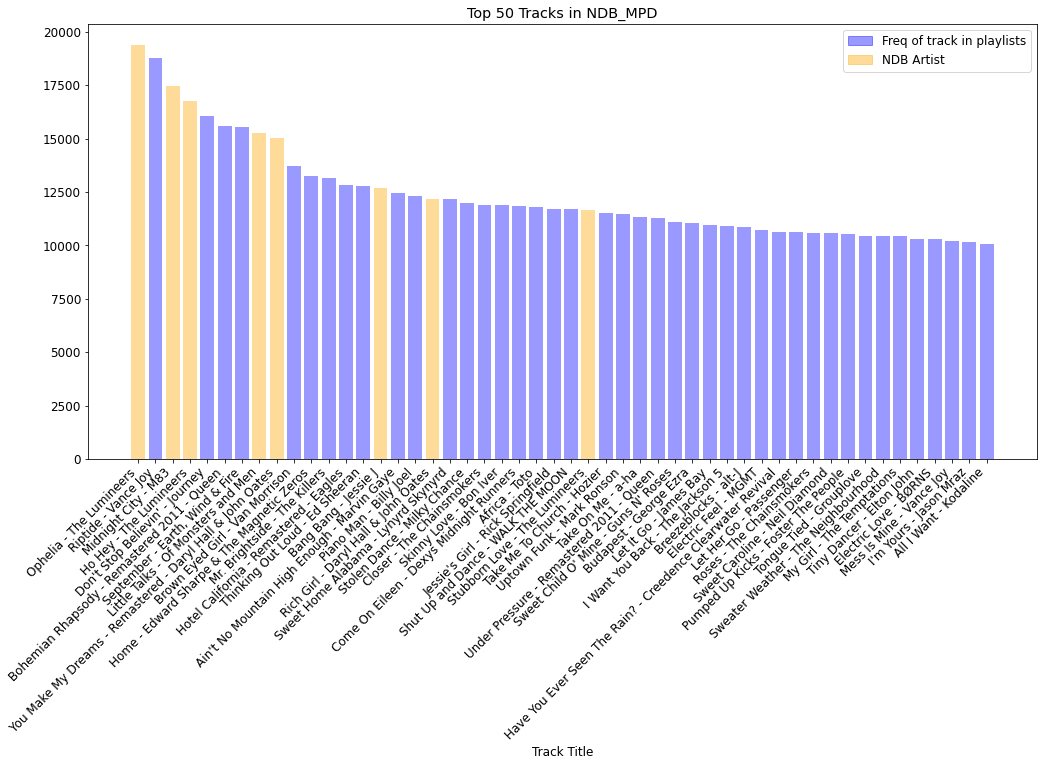

In [45]:
fig1 = plt.figure(figsize=(17,8))

col = []
for val in Top_50_tracks.index:
    if val in is_NDB:
        col.append(colors[3])
    else:
        col.append(colors[0])
plt.bar(Top_50_tracks.title, Top_50_tracks.index, color = col, alpha=0.4)

plt.title("Top 50 Tracks in NDB_MPD")
plt.xlabel("Track Title")
plt.xticks(rotation=45, ha='right')
legend_box = mpatches.Patch(label='Freq of track in playlists', color=colors[0], alpha=0.4)
legend_box2 = mpatches.Patch(label='NDB Artist', color=colors[3], alpha=0.4)
plt.legend(handles=[legend_box, legend_box2], loc='upper right')

#plt.show()

In [46]:
fig1.savefig('./visualization/Top 50 Tracks in NDB_MPD.png')

### Top 50 Artists in NDB_MPD dataset

In [47]:
# Top artists (highest rated inside playlist)

Top_50_artists_Rates = tracks_df.groupby(['artist_name']).agg({'track_rates': 'sum', 'spid': 'count', 'NDB': 'max'})\
                                .sort_values(by=['track_rates'], ascending=False)[0:50]

In [48]:
Top_50_artists_Rates

,track_rates,spid,NDB
artist_name,,,
Ed Sheeran,129048,136,0
The Lumineers,110513,41,1
Drake,110246,154,0
Coldplay,107570,225,0
Rihanna,104435,260,0
...,...,...,...
Lorde,45761,37,0
The 1975,45687,67,0
Daryl Hall & John Oates,45677,258,1


In [49]:
is_NDB2 = list(Top_50_artists_Rates[Top_50_artists_Rates['NDB']==1].index)

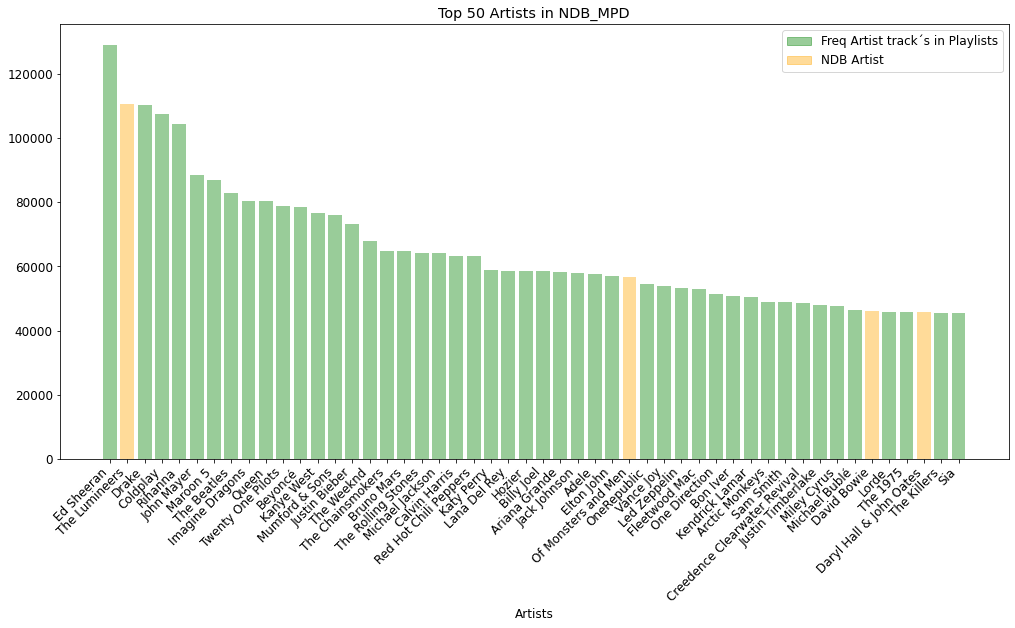

In [50]:
fig2 = plt.figure(figsize=(17,8))

col = []
for val in Top_50_artists_Rates.index:
    if val in is_NDB2:
        col.append(colors[3])
    else:
        col.append(colors[1])
plt.bar(Top_50_artists_Rates.index, Top_50_artists_Rates['track_rates'], color = col, alpha=0.4)

plt.title("Top 50 Artists in NDB_MPD")
plt.xlabel("Artists")
plt.xticks(rotation=45, ha='right')
legend_box = mpatches.Patch(label='Freq Artist track´s in Playlists', color=colors[1], alpha=0.4)
legend_box2 = mpatches.Patch(label='NDB Artist', color=colors[3], alpha=0.4)
plt.legend(handles=[legend_box, legend_box2], loc='upper right')

#plt.show()

In [51]:
fig2.savefig('./visualization/Top 50 Artists in NDB_MPD.png')

### Num. of tracks from 50 Top Artists in NDB_MPD dataset

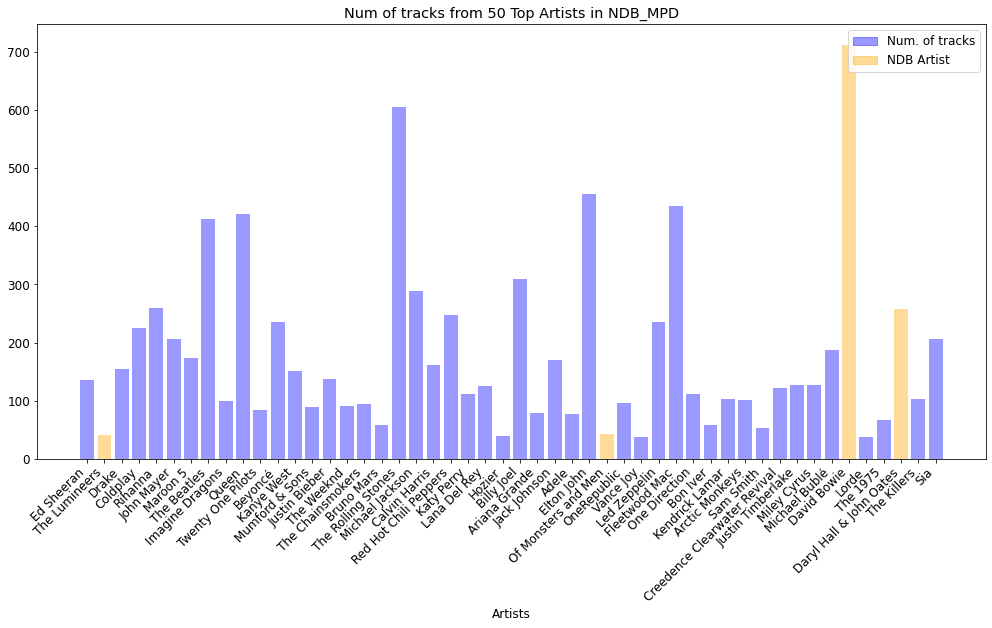

In [52]:
fig3 = plt.figure(figsize=(17,8))

col = []
for val in Top_50_artists_Rates.index:
    if val in is_NDB2:
        col.append(colors[3])
    else:
        col.append(colors[0])
plt.bar(Top_50_artists_Rates.index, Top_50_artists_Rates['spid'], color = col, alpha=0.4)

plt.title("Num of tracks from 50 Top Artists in NDB_MPD")
plt.xlabel("Artists")
plt.xticks(rotation=45, ha='right')
legend_box = mpatches.Patch(label='Num. of tracks', color=colors[0], alpha=0.4)
legend_box2 = mpatches.Patch(label='NDB Artist', color=colors[3], alpha=0.4)
plt.legend(handles=[legend_box, legend_box2], loc='upper right')

#plt.show()

In [53]:
fig3.savefig('./visualization/Num of tracks from 50 Top Artists in NDB_MPD.png')

### Top 50 Artists with more tracks in NDB_MPD

In [54]:
Top_tracks_artist = tracks_df.groupby(['artist_name']).agg({'spid':'count', 'track_rates': 'sum', 'NDB': 'max'})\
                                .sort_values(by=['spid'], ascending=False)[0:50]

In [55]:
Top_tracks_artist

,spid,track_rates,NDB
artist_name,,,
Vitamin String Quartet,1699,9350,0
Frank Sinatra,1522,44588,0
Johann Sebastian Bach,1497,4210,0
Grateful Dead,1316,15843,0
Frédéric Chopin,1201,3666,0
...,...,...,...
Neil Young,440,10783,0
Eric Clapton,439,18647,0
Marvin Gaye,437,32864,0


In [56]:
is_NDB3 = list(Top_tracks_artist[Top_tracks_artist['NDB']==1].index)

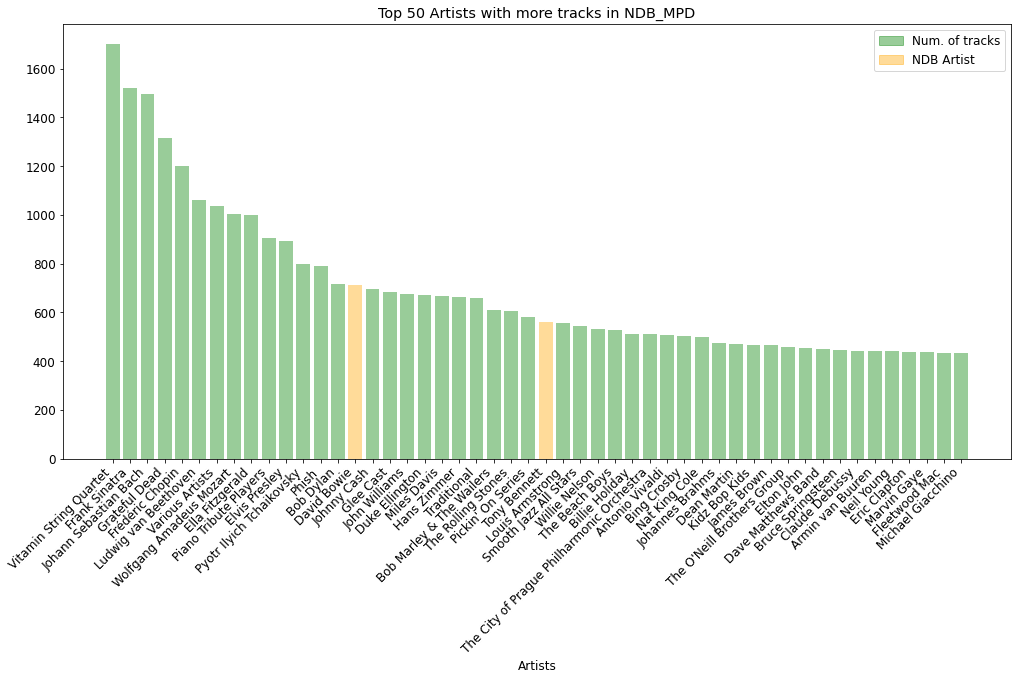

In [109]:
fig4 = plt.figure(figsize=(17,8))

col = []
for val in Top_tracks_artist.index:
    if val in is_NDB3:
        col.append(colors[3])
    else:
        col.append(colors[1])
plt.bar(Top_tracks_artist.index, Top_tracks_artist['spid'], color = col, alpha=0.4)

plt.title("Top 50 Artists with more tracks in NDB_MPD")
plt.xlabel("Artists")
plt.xticks(rotation=45, ha='right')
legend_box = mpatches.Patch(label='Num. of tracks', color=colors[1], alpha=0.4)
legend_box2 = mpatches.Patch(label='NDB Artist', color=colors[3], alpha=0.4)
plt.legend(handles=[legend_box, legend_box2], loc='upper right')

#plt.show()

In [110]:
fig4.savefig('./visualization/Top 50 Artists with more tracks in NDB_MPD.png')

### 3. Rating Matrix  
  
* Sparsity describe the percentage of zero values from items not populated against those that have been rated inside the matrix.
* The distribution of ratings among tracks is known as "Long Tail" effect, only a small fraction of items are rated frequently while vast majority are rated rarely.  
* Visualizing rating frequency in log scale, we can observe that only a 15% of tracks has obtain 10 ratings or more and 45% of tracks only once.

In [59]:
sparse_matrix

<279032x1124914 sparse matrix of type '<class 'numpy.int8'>'
	with 23545215 stored elements in Compressed Sparse Row format>

### Spartity
The sparsity of data derives from the ratio of the empty and total records in the user-item matrix.  
Sparsity = 1 — |R|/|I|*|U|  
Where,  
* R = Rating  
* I = Items  
* U = Users

In [111]:
# R: Ratings = store elements
# I: Tracks length = Items
# U: Playlists length = Users

R = sparse_matrix.nnz
I = sparse_matrix.shape[1]
U = sparse_matrix.shape[0]
sparsity = 1 - (R / (I * U))

In [112]:
print(f'Sparsity level of Rating Matrix, {sparsity:1.6f}')

Sparsity level of Rating Matrix, 0.999925


In [63]:
# Rating frequency
df_tracks_cnt = pd.DataFrame(tracks_df['track_rates'], tracks_df['tid'])
df_tracks_cnt = df_tracks_cnt.sort_values('track_rates', ascending=False).reset_index(drop=True)

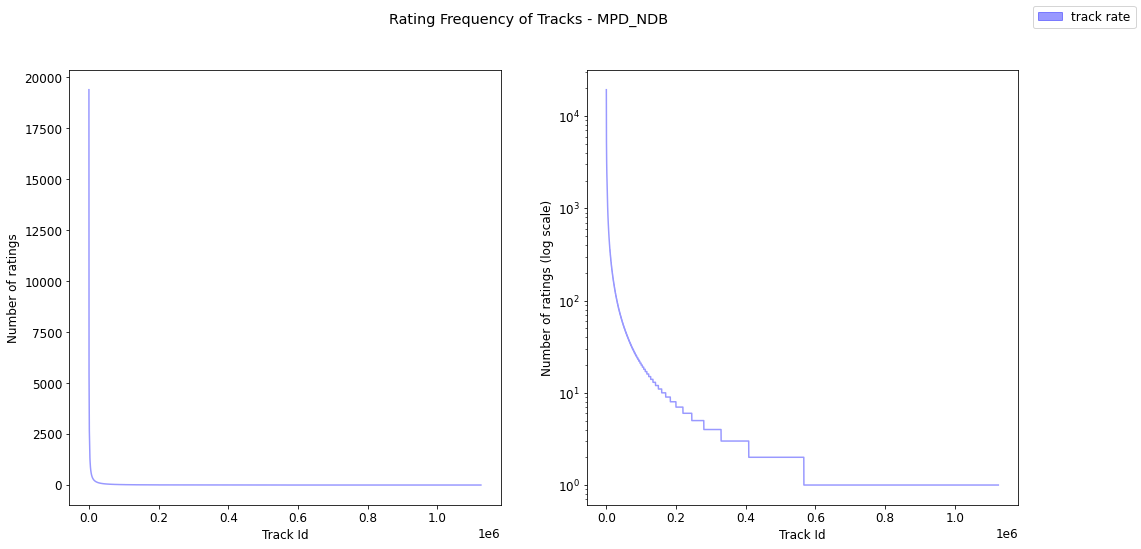

In [99]:
# Plot: Rating frequency tracks

fig5 = plt.figure(figsize=(17,8))
fig5.suptitle('Rating Frequency of Tracks - MPD_NDB')

ax1 = fig5.add_subplot(121)
ax1.plot(df_tracks_cnt.index, df_tracks_cnt.track_rates, color = colors[0], alpha=0.4)
ax1.set_xlabel("Track Id")
ax1.set_ylabel("Number of ratings")

ax2 = fig5.add_subplot(122)
ax2.set_yscale('log')
ax2.plot(df_tracks_cnt.index, df_tracks_cnt.track_rates, color = colors[0], alpha=0.4)
ax2.set_xlabel("Track Id")
ax2.set_ylabel("Number of ratings (log scale)")

legend_box = mpatches.Patch(label='track rate', color=colors[0], alpha=0.4)
fig5.legend(handles=[legend_box], loc='upper right')

In [104]:
df_tracks_cnt['track_rates'].quantile(np.arange(1, 0.4, -0.05))

1.00    19393.0
0.95       45.0
0.90       17.0
0.85       10.0
0.80        6.0
         ...   
0.65        3.0
0.60        2.0
0.55        2.0
0.50        2.0
0.45        1.0
Name: track_rates, Length: 12, dtype: float64

In [103]:
df_tracks_cnt['track_rates'].quantile(np.arange(1, 0.85, -0.01))

1.00    19393.0
0.99      323.0
0.98      145.0
0.97       87.0
0.96       60.0
         ...   
0.89       15.0
0.88       13.0
0.87       12.0
0.86       11.0
0.85       10.0
Name: track_rates, Length: 16, dtype: float64

In [105]:
fig5.savefig('./visualization/Rating Frequency of Tracks - MPD_NDB.png')